Details of dataset:


Sex - male, female
Age - round up to 5 year
Height - round up to 5 cm[cm]
Weight [kg]
Waistline
Sight_left - eyesight(left) the column shows how well the left eye sees, where perfect vision = 1.0
Sight_right - eyesight(right) the column shows how well the right eye sees where perfect vision = 1.0
Hear_left - hearing left, 1(normal), 2(abnormal)
Hear_right - hearing right, 1(normal), 2(abnormal)
SBP - Systolic blood pressure[mmHg]
DBP - Diastolic blood pressure[mmHg]
BLDS - BLDS or FSG(fasting blood glucose)[mg/dL]
Tot_chole - total cholesterol[mg/dL]
HDL_chole - HDL cholesterol[mg/dL] - the only fraction of cholesterol that is called "good", "useful" cholesterol.
LDL_chole - LDL cholesterol[mg/dL]
Triglyceride - triglyceride[mg/dL]
Hemoglobin - hemoglobin[g/dL]
Urine_protein - protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
Serum_creatinine - serum(blood) creatinine[mg/dL] 혈청 크레아티닌
SGOT_AST - SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]
SGOT_ALT - ALT(Alanine transaminase)[IU/L]
Gamma_GTP - y-glutamyl transpeptidase[IU/L]
SMK_stat_type_cd - Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
DRK_YN - Drinker or Not

1................................DATA GATHERING AND EXPLORATION.........................................

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [97]:
# import pandas as pd

# # Load the original dataset
# original_data = pd.read_csv('smoking_drinking_dataset_Ver01.csv')

# sampled_data = original_data.sample(frac=0.05)

# # Save the sampled data to a new file
# sampled_data.to_csv('sampled_data.csv', index=False)


In [98]:
data = pd.read_csv('sampled_data.csv')
data

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,25,165,50,67.0,1.2,1.0,1.0,1.0,117.0,...,94.0,107.0,14.4,1.0,0.8,28.0,17.0,20.0,1.0,N
1,Female,75,145,40,79.0,0.1,0.1,1.0,1.0,160.0,...,109.0,100.0,13.4,1.0,0.8,20.0,12.0,6.0,1.0,N
2,Female,50,145,40,66.0,0.6,0.5,1.0,1.0,150.0,...,142.0,127.0,14.0,1.0,0.7,10.0,22.0,19.0,1.0,N
3,Female,40,160,60,78.0,1.5,1.5,1.0,1.0,119.0,...,123.0,81.0,13.8,1.0,0.6,20.0,16.0,20.0,1.0,Y
4,Female,50,150,55,74.5,1.2,1.0,1.0,1.0,142.0,...,101.0,119.0,13.4,1.0,0.6,19.0,13.0,17.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49562,Female,50,155,65,85.7,0.6,0.9,1.0,1.0,124.0,...,107.0,107.0,11.0,1.0,0.7,17.0,11.0,14.0,1.0,N
49563,Male,35,180,85,89.0,1.0,1.2,1.0,1.0,130.0,...,221.0,100.0,15.4,1.0,0.9,30.0,22.0,19.0,1.0,N
49564,Male,70,155,50,73.0,1.2,0.9,1.0,1.0,120.0,...,89.0,101.0,14.4,1.0,0.8,32.0,22.0,28.0,2.0,N
49565,Female,35,155,50,70.0,1.5,1.5,1.0,1.0,123.0,...,152.0,62.0,14.5,1.0,0.7,14.0,10.0,15.0,1.0,N


In [99]:
data.rename(columns={'SMK_stat_type_cd': 'Smoking_status', 'DRK_YN': 'Drinking_status'}, inplace=True)

In [100]:
# import warnings
# warnings.filterwarnings('ignore') 
# %pip install ydata-profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(data, title="Ydata Profiling Report")
# profile

In [101]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49567 entries, 0 to 49566
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               49567 non-null  object 
 1   age               49567 non-null  int64  
 2   height            49567 non-null  int64  
 3   weight            49567 non-null  int64  
 4   waistline         49567 non-null  float64
 5   sight_left        49567 non-null  float64
 6   sight_right       49567 non-null  float64
 7   hear_left         49567 non-null  float64
 8   hear_right        49567 non-null  float64
 9   SBP               49567 non-null  float64
 10  DBP               49567 non-null  float64
 11  BLDS              49567 non-null  float64
 12  tot_chole         49567 non-null  float64
 13  HDL_chole         49567 non-null  float64
 14  LDL_chole         49567 non-null  float64
 15  triglyceride      49567 non-null  float64
 16  hemoglobin        49567 non-null  float6

In [102]:
import pandas as pd

# Convert the 'Smoking_status' to int
df.Smoking_status = pd.to_numeric(df.Smoking_status, errors = 'coerce')# ------------- Convert to number to ascertain the median value
df['Smoking_status'] = df['Smoking_status'].astype(int)

# Print the DataFrame to verify the conversion
print(df.Smoking_status)


0        1
1        1
2        1
3        1
4        1
        ..
49562    1
49563    1
49564    2
49565    1
49566    3
Name: Smoking_status, Length: 49567, dtype: int32


In [103]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,Smoking_status
count,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000,...,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000,49567.000000
mean,47.603446,162.207921,63.264773,81.246579,0.978421,0.978502,1.032280,1.031493,122.388625,76.102306,...,56.917385,113.257530,132.223354,14.221619,1.094640,0.857936,26.005145,26.012387,37.007908,1.608026
std,14.124837,9.316745,12.604487,11.987144,0.598228,0.615005,0.176743,0.174647,14.521667,9.887998,...,15.237309,35.280098,102.140575,1.586551,0.440849,0.323236,19.905460,42.937167,50.188937,0.816661
min,20.000000,130.000000,30.000000,42.000000,0.100000,0.100000,1.000000,1.000000,73.000000,40.000000,...,3.000000,1.000000,6.000000,4.200000,1.000000,0.100000,3.000000,2.000000,1.000000,1.000000
25%,40.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,74.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.950000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,130.000000,999.000000,9.900000,9.900000,2.000000,2.000000,238.000000,160.000000,...,701.000000,1798.000000,2507.000000,20.200000,6.000000,35.000000,1509.000000,7210.000000,999.000000,3.000000


In [104]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
Smoking_status      0
Drinking_status     0
dtype: int64

In [105]:
# The number of unique values in each column
df.nunique()


sex                   2
age                  14
height               13
weight               21
waistline           554
sight_left           20
sight_right          21
hear_left             2
hear_right            2
SBP                 134
DBP                  94
BLDS                294
tot_chole           303
HDL_chole           134
LDL_chole           275
triglyceride        805
hemoglobin          144
urine_protein         6
serum_creatinine     70
SGOT_AST            222
SGOT_ALT            256
gamma_GTP           479
Smoking_status        3
Drinking_status       2
dtype: int64

In [106]:
# Checking data for duplicates
df[df.duplicated].shape

(0, 24)

In [107]:
#Removing duplicates (Удаляем  дубликаты)
df = df.drop_duplicates(keep='first')
df[df.duplicated].shape

(0, 24)

In [108]:
%matplotlib inline


<Figure size 700x1500 with 0 Axes>

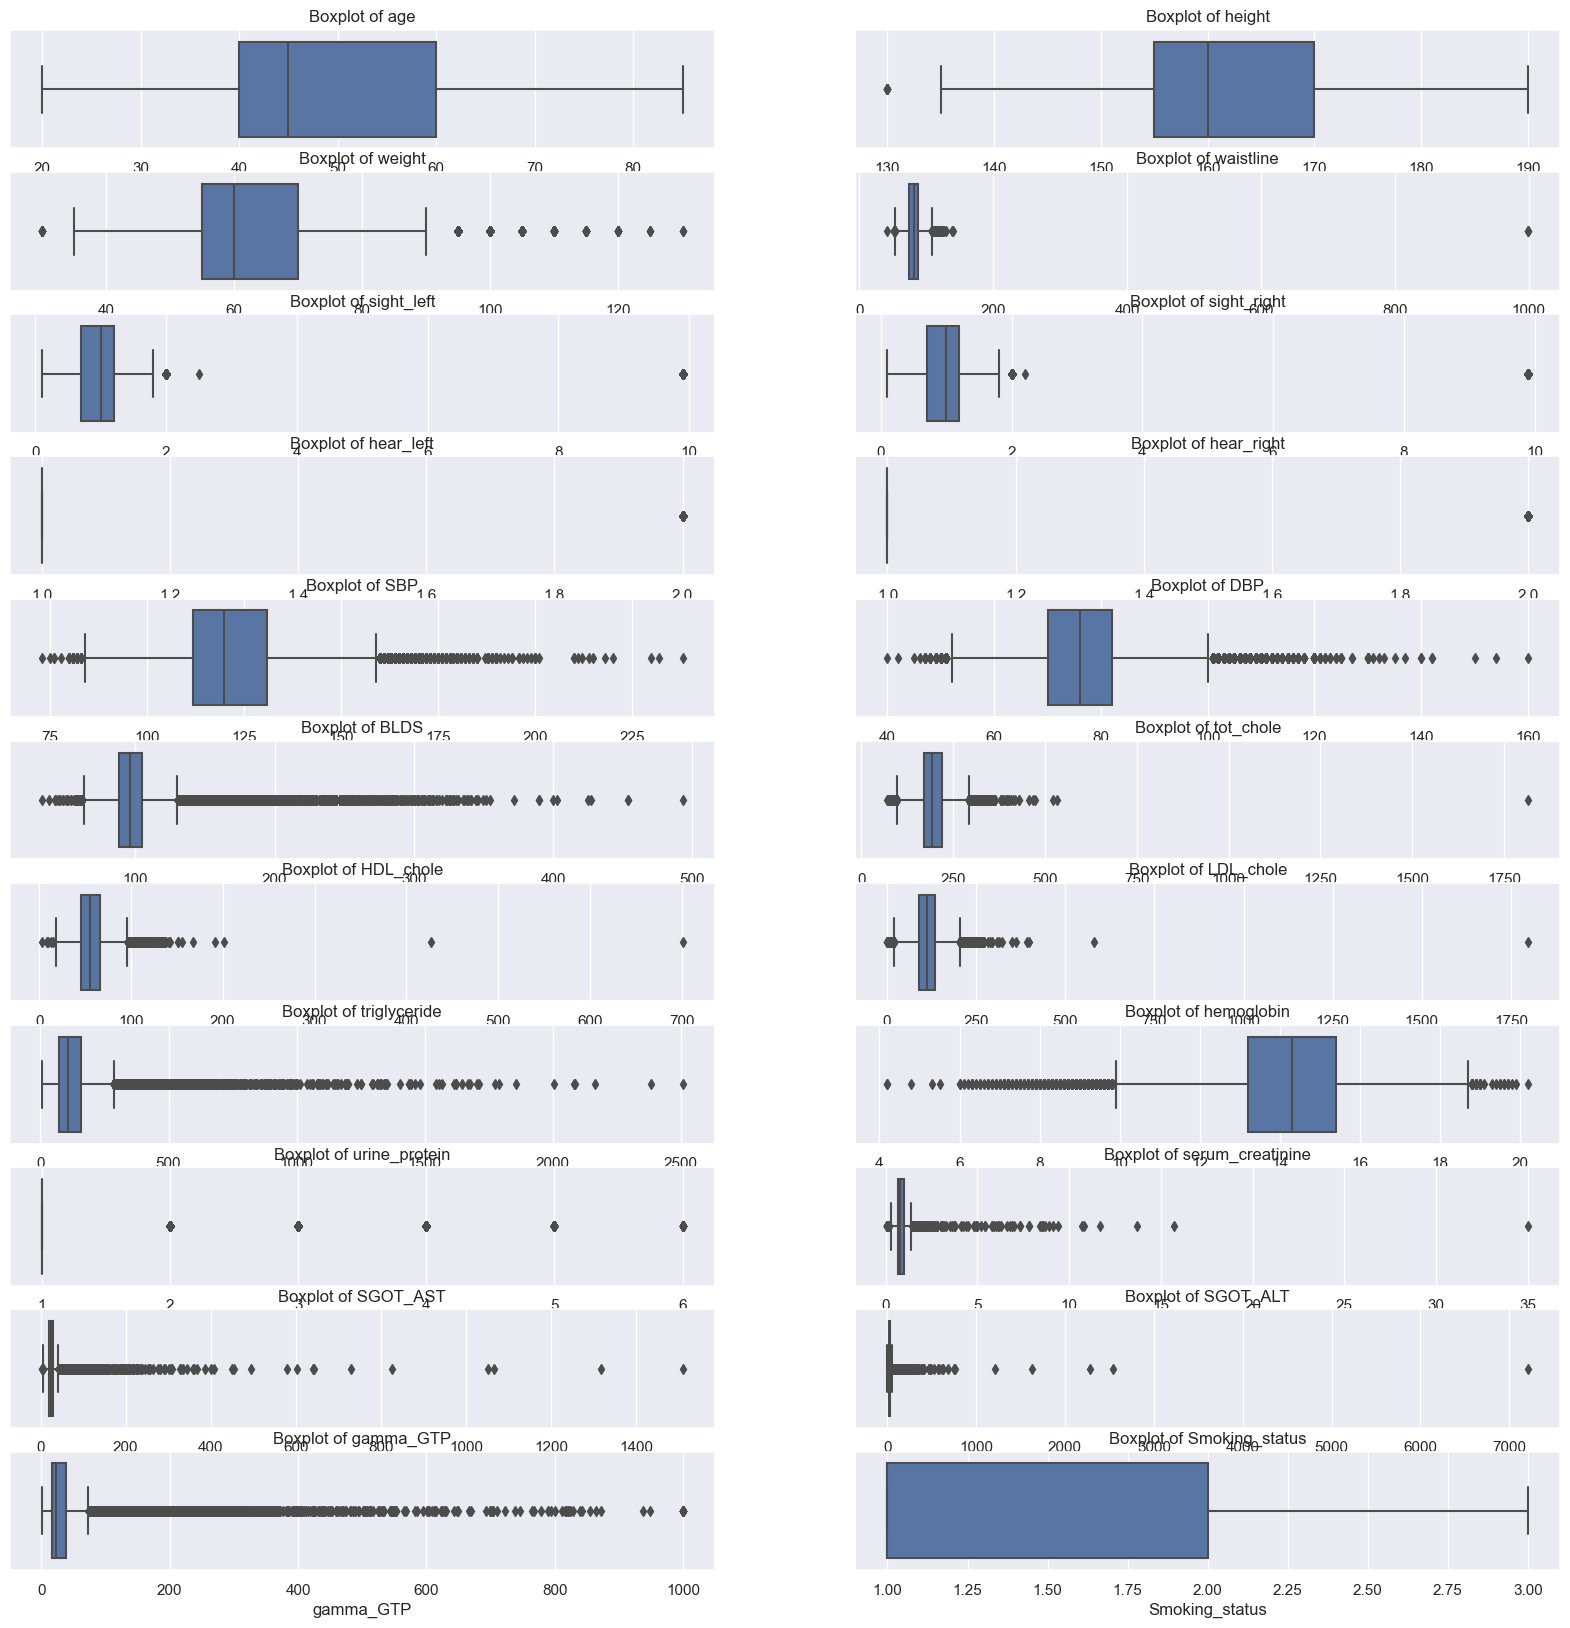

In [109]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns 
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2  # module://matplotlib_inline.backend_inline

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))  

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

plt.tight_layout()
plt.show()
plot_boxplots(df)


In [110]:
# pip install pyod
from pyod.models.ecod import ECOD
# Remove Outliers
def outlierRemover(dataframe):
    clf = ECOD()
    clf.fit(dataframe)
    outliers = clf.predict(dataframe) 

    dataframe["outliers"] = outliers
    dataframe = dataframe.loc[dataframe['outliers'] == 0]
    dataframe.drop('outliers', axis = 1, inplace = True)
    print(dataframe.shape)
    return dataframe

df2 = outlierRemover(df.select_dtypes(include='number'))
df2.reset_index(inplace = True)

df2 = pd.merge(df2, df.select_dtypes(exclude = 'number').reset_index(), how = 'left', on = 'index')
df2.drop('index', axis = 1, inplace= True)
df2 


(44610, 22)


,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,Smoking_status,sex,Drinking_status
0,25,165,50,67.0,1.2,1.0,1.0,1.0,117.0,77.0,...,107.0,14.4,1.0,0.8,28.0,17.0,20.0,1,Male,N
1,40,160,60,78.0,1.5,1.5,1.0,1.0,119.0,78.0,...,81.0,13.8,1.0,0.6,20.0,16.0,20.0,1,Female,Y
2,50,150,55,74.5,1.2,1.0,1.0,1.0,142.0,91.0,...,119.0,13.4,1.0,0.6,19.0,13.0,17.0,1,Female,N
3,60,155,60,78.0,0.7,1.0,1.0,1.0,132.0,75.0,...,83.0,14.3,1.0,0.7,24.0,20.0,18.0,1,Female,N
4,40,175,65,80.0,0.9,0.9,1.0,1.0,117.0,64.0,...,75.0,16.0,1.0,0.9,17.0,20.0,18.0,1,Male,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44605,50,155,65,85.7,0.6,0.9,1.0,1.0,124.0,70.0,...,107.0,11.0,1.0,0.7,17.0,11.0,14.0,1,Female,N
44606,35,180,85,89.0,1.0,1.2,1.0,1.0,130.0,70.0,...,100.0,15.4,1.0,0.9,30.0,22.0,19.0,1,Male,N
44607,70,155,50,73.0,1.2,0.9,1.0,1.0,120.0,75.0,...,101.0,14.4,1.0,0.8,32.0,22.0,28.0,2,Male,N
44608,35,155,50,70.0,1.5,1.5,1.0,1.0,123.0,83.0,...,62.0,14.5,1.0,0.7,14.0,10.0,15.0,1,Female,N


In [111]:
## The type of sex column is changed to numerical
# df2['sex'] = df2['sex'].map({'Male':1,'Female':2})
df2['Drinking_status'] = df2['Drinking_status']. map({'Y':1,'N':0})

df2

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,Smoking_status,sex,Drinking_status
0,25,165,50,67.0,1.2,1.0,1.0,1.0,117.0,77.0,...,107.0,14.4,1.0,0.8,28.0,17.0,20.0,1,Male,0
1,40,160,60,78.0,1.5,1.5,1.0,1.0,119.0,78.0,...,81.0,13.8,1.0,0.6,20.0,16.0,20.0,1,Female,1
2,50,150,55,74.5,1.2,1.0,1.0,1.0,142.0,91.0,...,119.0,13.4,1.0,0.6,19.0,13.0,17.0,1,Female,0
3,60,155,60,78.0,0.7,1.0,1.0,1.0,132.0,75.0,...,83.0,14.3,1.0,0.7,24.0,20.0,18.0,1,Female,0
4,40,175,65,80.0,0.9,0.9,1.0,1.0,117.0,64.0,...,75.0,16.0,1.0,0.9,17.0,20.0,18.0,1,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44605,50,155,65,85.7,0.6,0.9,1.0,1.0,124.0,70.0,...,107.0,11.0,1.0,0.7,17.0,11.0,14.0,1,Female,0
44606,35,180,85,89.0,1.0,1.2,1.0,1.0,130.0,70.0,...,100.0,15.4,1.0,0.9,30.0,22.0,19.0,1,Male,0
44607,70,155,50,73.0,1.2,0.9,1.0,1.0,120.0,75.0,...,101.0,14.4,1.0,0.8,32.0,22.0,28.0,2,Male,0
44608,35,155,50,70.0,1.5,1.5,1.0,1.0,123.0,83.0,...,62.0,14.5,1.0,0.7,14.0,10.0,15.0,1,Female,0


2......................................DATA VISUALIZATION AND MODEL SELECTION.............................

Text(0.5, 1.0, 'Correlation Heatmap')

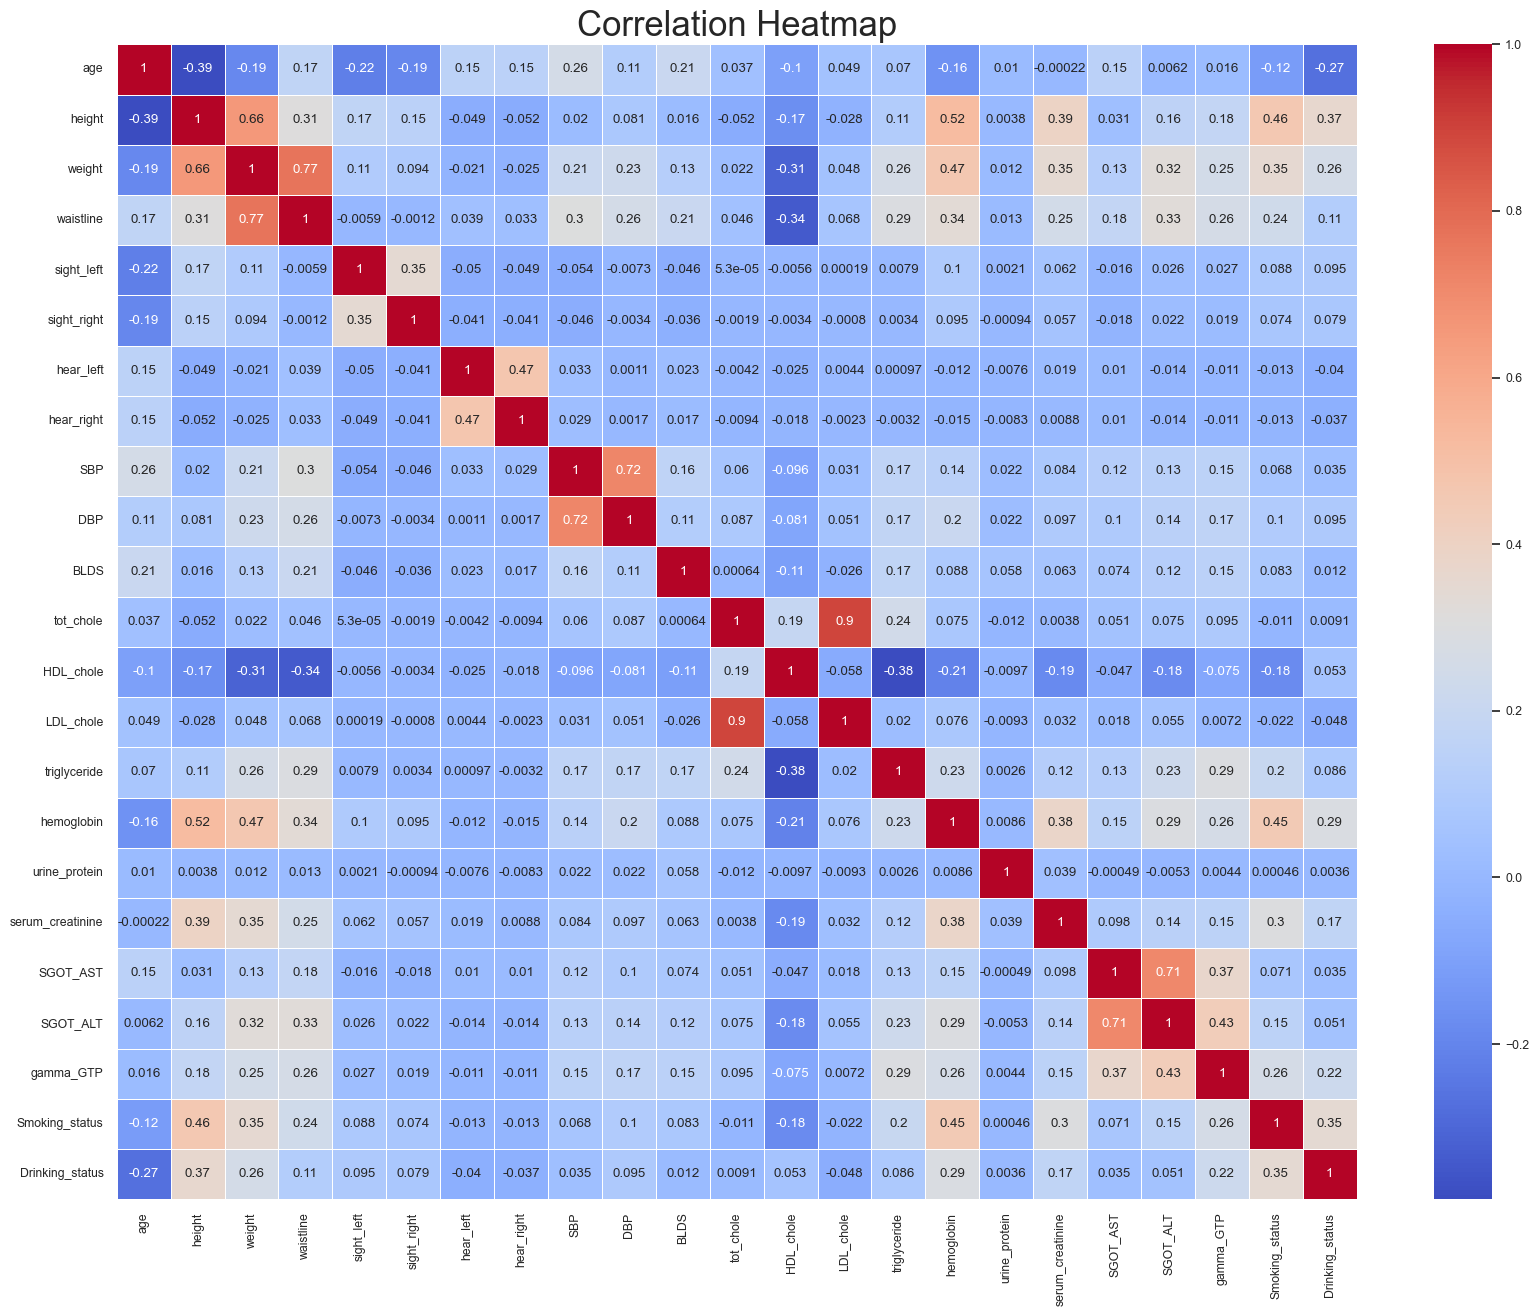

In [112]:
corr_matrix = df2.corr()
plt.figure(figsize = (20,15))
sns.set(font_scale=0.8)
##sns.set_style('whitegrid')
##sns.color_palette('coolwarm')
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap',fontsize = 25)

<Axes: xlabel='Smoking_status', ylabel='count'>

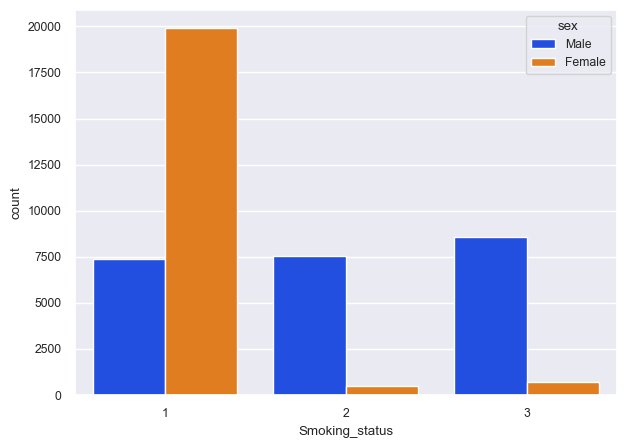

In [113]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df2, x='Smoking_status',hue='sex',palette='bright')


In [114]:
# The smoking history column is distributes as follows;

# 1.0 - Non Smokers

# 2.0 - Ex smokers

# 3.0 - Smokers

non_smokers = df2[df2['Smoking_status'] == 1.0]
ex_smokers = df2[df2['Smoking_status'] == 2.0]
smokers = df2[df2['Smoking_status'] == 3.0]

Text(0.5, 1.0, 'Smokers')

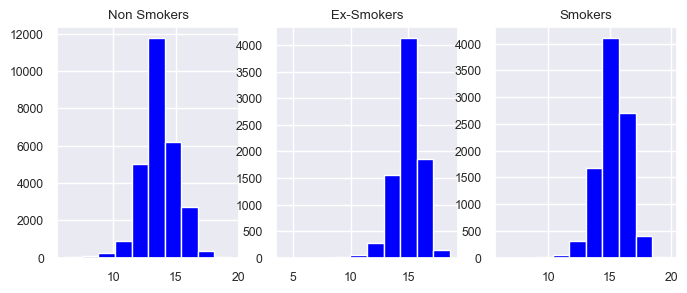

In [115]:
# HEMOGLOBIN

# Hemoglobin (Hb) is the protein contained in red blood cells that is responsible for delivery of oxygen to the tissues. 
# To ensure adequate tissue oxygenation, a sufficient hemoglobin level must be maintained.

# What happens when hemoglobin is low? If a disease or condition affects your body's ability to produce red blood cells, 
# your hemoglobin levels may drop. When your hemoglobin level is low, it means your body isn't getting enough oxygen, making you feel very tired and weak.

# Next, we are going to compare the hemoglobin level of the individuals according to their smoking history.

fig,axes = plt.subplots (nrows=1,ncols=3,figsize =(8,3))


axes[0].hist(non_smokers['hemoglobin'],color = 'blue')
axes[0].set_title('Non Smokers')
axes[1].hist(ex_smokers['hemoglobin'],color = 'blue')
axes[1].set_title('Ex-Smokers')
axes[2].hist(smokers['hemoglobin'],color = 'blue')
axes[2].set_title('Smokers')

Text(0.5, 1.0, 'Hemoglobin level - Smokers vs Non - Smokers')

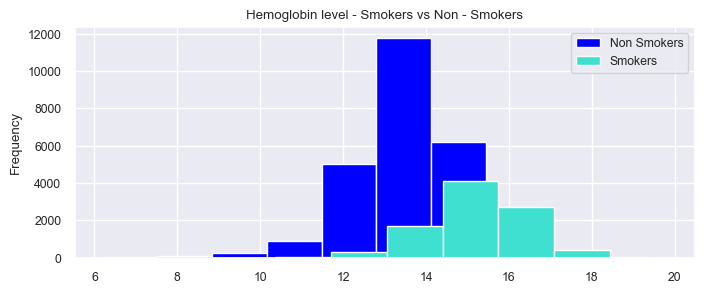

In [116]:
plt.figure(figsize = (8, 3))
non_smokers['hemoglobin'].plot.hist(label='Non Smokers',legend=True,color='blue')
##non_smokers['hemoglobin'].plot.kde()
##ex_smokers['hemoglobin'].plot.hist(label = 'ex',legend=True)
smokers['hemoglobin'].plot.hist(label ='Smokers',legend=True,color='turquoise')
#smokers['hemoglobin'].plot.kde()
plt.title('Hemoglobin level - Smokers vs Non - Smokers')

<Axes: xlabel='Smoking_status', ylabel='weight'>

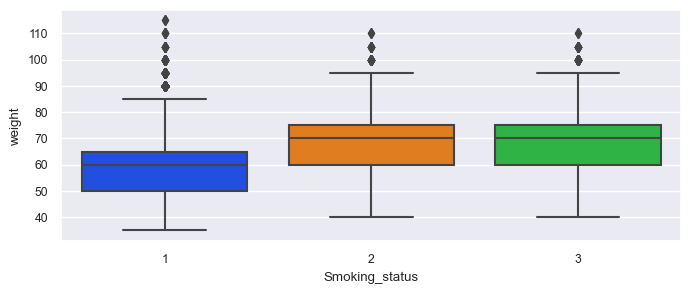

In [117]:
plt.figure(figsize = (8, 3))
sns.boxplot(x='Smoking_status',y='weight',data=df2,palette = 'bright')

# The average weight of both current and former smokers is slightly greater than that of non-smokers


<Axes: xlabel='Drinking_status', ylabel='count'>

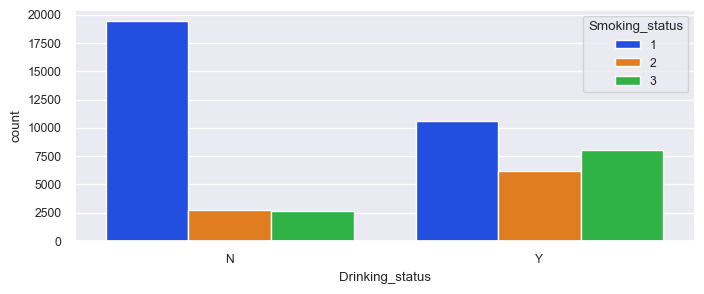

In [118]:
plt.figure(figsize = (8, 3))
sns.countplot(x='Drinking_status',hue='Smoking_status',data=df,palette = 'bright')


<Axes: xlabel='Smoking_status', ylabel='age'>

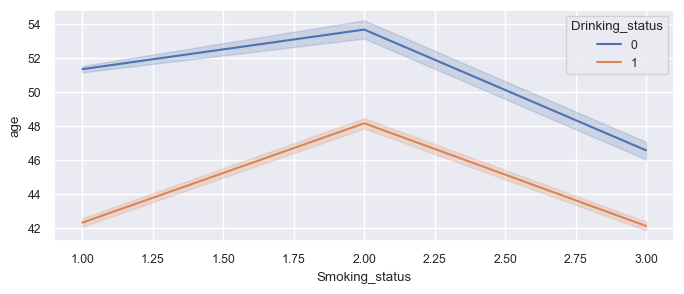

In [119]:
plt.figure(figsize = (8, 3))
sns.lineplot(x='Smoking_status',y='age',data=df2,hue='Drinking_status')


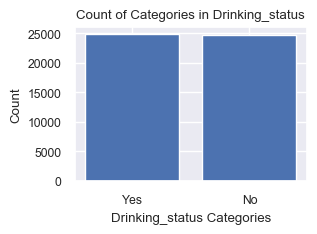

In [120]:
counts = df['Drinking_status'].value_counts()

plt.figure(figsize=(3, 2))  # Optional: Adjust the figure size
plt.bar(counts.index, counts.values)
plt.xlabel("Drinking_status Categories")
plt.xticks(counts.index, ["Yes", "No"])  # Specify tick positions and labels
plt.ylabel("Count")
plt.title("Count of Categories in Drinking_status")
plt.show()

In [121]:
df2

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,Smoking_status,sex,Drinking_status
0,25,165,50,67.0,1.2,1.0,1.0,1.0,117.0,77.0,...,107.0,14.4,1.0,0.8,28.0,17.0,20.0,1,Male,0
1,40,160,60,78.0,1.5,1.5,1.0,1.0,119.0,78.0,...,81.0,13.8,1.0,0.6,20.0,16.0,20.0,1,Female,1
2,50,150,55,74.5,1.2,1.0,1.0,1.0,142.0,91.0,...,119.0,13.4,1.0,0.6,19.0,13.0,17.0,1,Female,0
3,60,155,60,78.0,0.7,1.0,1.0,1.0,132.0,75.0,...,83.0,14.3,1.0,0.7,24.0,20.0,18.0,1,Female,0
4,40,175,65,80.0,0.9,0.9,1.0,1.0,117.0,64.0,...,75.0,16.0,1.0,0.9,17.0,20.0,18.0,1,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44605,50,155,65,85.7,0.6,0.9,1.0,1.0,124.0,70.0,...,107.0,11.0,1.0,0.7,17.0,11.0,14.0,1,Female,0
44606,35,180,85,89.0,1.0,1.2,1.0,1.0,130.0,70.0,...,100.0,15.4,1.0,0.9,30.0,22.0,19.0,1,Male,0
44607,70,155,50,73.0,1.2,0.9,1.0,1.0,120.0,75.0,...,101.0,14.4,1.0,0.8,32.0,22.0,28.0,2,Male,0
44608,35,155,50,70.0,1.5,1.5,1.0,1.0,123.0,83.0,...,62.0,14.5,1.0,0.7,14.0,10.0,15.0,1,Female,0


In [122]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
lb = LabelEncoder()
dp = df2.drop(['Smoking_status', 'Drinking_status'], axis = 1) 

def transform(dataframe):
    # Standard Scaling
    for i in dp:
        if dataframe[i].dtype == int or dataframe[i].dtype == float:
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])

    # Label Encode
        elif dataframe[i].dtype == 'O':
            dataframe[i] = lb.fit_transform(dataframe[i])

    return dataframe

transform(df2)

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,Smoking_status,sex,Drinking_status
0,25,165,50,-1.552158,0.461716,0.043480,-0.152278,-0.149088,-0.359839,0.125172,...,-0.233634,0.113355,-0.188032,-0.235442,0.332956,-0.455695,-0.384503,1,1,0
1,40,160,60,-0.322152,1.078114,0.998592,-0.152278,-0.149088,-0.211417,0.233703,...,-0.555405,-0.286563,-0.188032,-1.203733,-0.461953,-0.521386,-0.384503,1,0,1
2,50,150,55,-0.713518,0.461716,0.043480,-0.152278,-0.149088,1.495445,1.644606,...,-0.085125,-0.553174,-0.188032,-1.203733,-0.561317,-0.718460,-0.473211,1,0,0
3,60,155,60,-0.322152,-0.565614,0.043480,-0.152278,-0.149088,0.753331,-0.091890,...,-0.530653,0.046702,-0.188032,-0.719587,-0.064498,-0.258621,-0.443642,1,0,0
4,40,175,65,-0.098515,-0.154682,-0.147542,-0.152278,-0.149088,-0.359839,-1.285731,...,-0.629660,1.179802,-0.188032,0.248704,-0.760044,-0.258621,-0.443642,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44605,50,155,65,0.538851,-0.771080,-0.147542,-0.152278,-0.149088,0.159640,-0.634545,...,-0.233634,-2.152845,-0.188032,-0.719587,-0.760044,-0.849843,-0.561920,1,0,0
44606,35,180,85,0.907853,0.050784,0.425525,-0.152278,-0.149088,0.604908,-0.634545,...,-0.320265,0.779884,-0.188032,0.248704,0.531684,-0.127239,-0.414072,1,1,0
44607,70,155,50,-0.881246,0.461716,-0.147542,-0.152278,-0.149088,-0.137205,-0.091890,...,-0.307889,0.113355,-0.188032,-0.235442,0.730411,-0.127239,-0.147947,2,1,0
44608,35,155,50,-1.216702,1.078114,0.998592,-0.152278,-0.149088,0.085429,0.776358,...,-0.790545,0.180008,-0.188032,-0.719587,-1.058135,-0.915534,-0.532350,1,0,0


In [123]:
# ANOVA F-value between label/feature

x = df2.drop(['Smoking_status', 'Drinking_status'], axis = 1) # --------------------------------- Define the Independent Variables
y = df2.Smoking_status # --------------------------------------------------- Define the dependent Variable

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
21,sex,15771.133552
1,height,7065.569638
15,hemoglobin,6295.958611
2,weight,3840.975323
17,serum_creatinine,2842.132843
3,waistline,1916.970585
20,gamma_GTP,1724.876917
14,triglyceride,965.852998
12,HDL_chole,776.550416
19,SGOT_ALT,636.292873


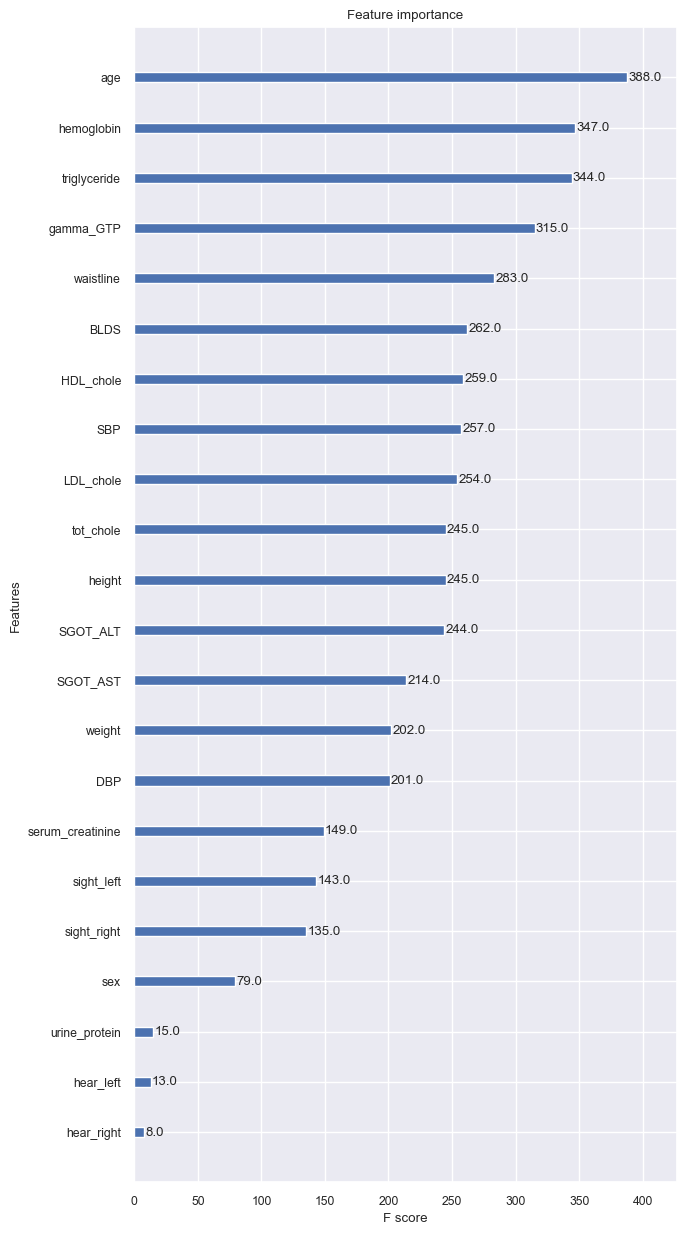

In [124]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x, y)

plt.rcParams['figure.figsize'] = (7, 15)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [125]:
df2.columns

Index(['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole',
       'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP',
       'Smoking_status', 'sex', 'Drinking_status'],
      dtype='object')

In [126]:
cols = ['gamma_GTP', 'hemoglobin', 'sex', 'triglyceride', 'BLDS', 'serum_creatinine', 'HDL_chole', 'age', 'urine_protein']

x = df2[cols]
y = df2.Smoking_status

x

,gamma_GTP,hemoglobin,sex,triglyceride,BLDS,serum_creatinine,HDL_chole,age,urine_protein
0,-0.384503,0.113355,1,-0.233634,-0.398262,-0.235442,-0.423845,25,-0.188032
1,-0.384503,-0.286563,0,-0.555405,-0.005567,-1.203733,0.826022,40,-0.188032
2,-0.473211,-0.553174,0,-0.085125,-0.103740,-1.203733,0.548274,50,-0.188032
3,-0.443642,0.046702,0,-0.530653,0.288955,-0.719587,2.006452,60,-0.188032
4,-0.443642,1.179802,1,-0.629660,-0.152827,0.248704,0.756585,40,-0.188032
...,...,...,...,...,...,...,...,...,...
44605,-0.561920,-2.152845,0,-0.233634,-0.251001,-0.719587,-0.632156,50,-0.188032
44606,-0.414072,0.779884,1,-0.320265,-0.496436,0.248704,-0.701593,35,-0.188032
44607,-0.147947,0.113355,1,-0.307889,-0.349175,-0.235442,0.964897,70,-0.188032
44608,-0.532350,0.180008,0,-0.790545,-0.889131,-0.719587,-0.284971,35,-0.188032


In [127]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y == 2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(y == 3)))


# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x, y = sm.fit_resample(x, y)

print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y == 3)))


Before OverSampling, counts of label '1': 27303
Before OverSampling, counts of label '2': 8021 

Before OverSampling, counts of label '3': 9286 

After OverSampling, counts of label '1': 27303
After OverSampling, counts of label '2': 27303
After OverSampling, counts of label '3': 27303


<Axes: xlabel='Smoking_status', ylabel='count'>

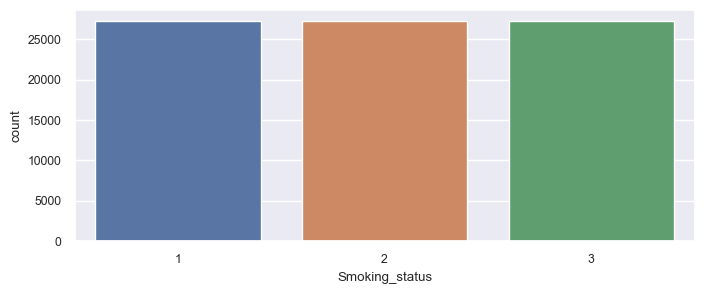

In [128]:
plt.figure(figsize = (8, 3))
sns.countplot(x = y)

3.......................................MODEL TRAINING AND TESTING......................................................

In [129]:
# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 555)
print(f'x_train: {xtrain.shape}')
print(f'x_test: {xtest.shape}')
print('y_train: {}'.format(ytrain.shape))
print('y_test: {}'.format(ytest.shape))

x_train: (65527, 9)
x_test: (16382, 9)
y_train: (65527,)
y_test: (16382,)


In [130]:
xtrain.shape

(65527, 9)

              precision    recall  f1-score   support

           1       0.74      0.84      0.79      4775
           2       0.59      0.57      0.58      5765
           3       0.59      0.55      0.57      5842

    accuracy                           0.64     16382
   macro avg       0.64      0.65      0.64     16382
weighted avg       0.63      0.64      0.64     16382



<Axes: >

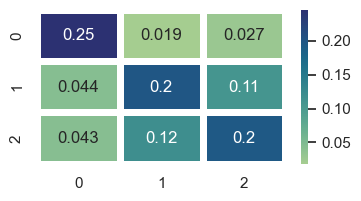

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
log_reg = LogisticRegression() # ----------------------------------------------- Instantiate the algorithm

log_reg.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to create a model
train_pred = log_reg.predict(xtest) # ----------------------------------------- Cros validate the model
print(classification_report(train_pred, ytest)) # ----------------------------- View the classification metrics of the model

revealer = confusion_matrix(train_pred, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [132]:
import pickle

# --------------------SAVE MODEL-------------------------
pickle.dump(log_reg, open('Smoking_stats.pkl', "wb"))

In [133]:
cols = ['gamma_GTP', 'hemoglobin', 'sex', 'triglyceride', 'BLDS', 'serum_creatinine', 'HDL_chole', 'age', 'urine_protein']

x = df2[cols]
y = df2.Drinking_status

y.head()

0    0
1    1
2    0
3    0
4    0
Name: Drinking_status, dtype: int64

In [134]:
# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 555)
print(f'x_train: {xtrain.shape}')
print(f'x_test: {xtest.shape}')
print('y_train: {}'.format(ytrain.shape))
print('y_test: {}'.format(ytest.shape))

x_train: (35688, 9)
x_test: (8922, 9)
y_train: (35688,)
y_test: (8922,)


              precision    recall  f1-score   support

           0       0.71      0.71      0.71      4449
           1       0.71      0.71      0.71      4473

    accuracy                           0.71      8922
   macro avg       0.71      0.71      0.71      8922
weighted avg       0.71      0.71      0.71      8922



<Axes: >

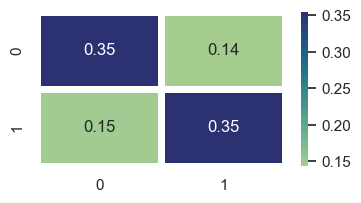

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logis_reg = LogisticRegression() # ----------------------------------------------- Instantiate the algorithm

logis_reg.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to create a model
train_pred = logis_reg.predict(xtest) # ----------------------------------------- Cros validate the model
print(classification_report(train_pred, ytest)) # ----------------------------- View the classification metrics of the model

revealer = confusion_matrix(train_pred, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [136]:
import pickle

# --------------------SAVE MODEL-------------------------
pickle.dump(logis_reg, open('Drinking_stats.pkl', "wb"))